In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np


data = pd.read_csv("SCFP2022.csv")
pd.set_option('display.max_columns', None)
data.head(15)

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,LF,LIFECL,FAMSTRUCT,RACECL,RACECL4,RACECL5,RACECL_EX,RACE,OCCAT1,OCCAT2,INDCAT,FOODHOME,FOODAWAY,FOODDELV,RENT,INCOME,WAGEINC,BUSSEFARMINC,INTDIVINC,KGINC,SSRETINC,TRANSFOTHINC,PENACCTWD,NORMINC,WSAVED,SAVED,SAVRES1,SAVRES2,SAVRES3,SAVRES4,SAVRES5,SAVRES6,SAVRES7,SAVRES8,SAVRES9,SPENDMOR,SPENDLESS,EXPENSHILO,LATE,LATE60,HPAYDAY,BNKRUPLAST5,KNOWL,YESFINRISK,NOFINRISK,CRDAPP,TURNDOWN,FEARDENIAL,TURNFEAR,FORECLLAST5,EMERGBORR,EMERGSAV,EMERGPSTP,EMERGCUT,EMERGWORK,HBORRFF,HBORRCC,HBORRALT,HBORRFIN,HSAVFIN,HSAVNFIN,HPSTPPAY,HPSTPLN,HPSTPOTH,HCUTFOOD,HCUTENT,HCUTOTH,FINLIT,BSHOPNONE,BSHOPGRDL,BSHOPMODR,ISHOPNONE,ISHOPGRDL,ISHOPMODR,BCALL,BMAGZNEWS,BMAILADTV,BINTERNET,BFRIENDWORK,BFINPRO,BSELF,BDONT,BOTHER,ICALL,IMAGZNEWS,IMAILADTV,IINTERNET,IFRIENDWORK,IFINPRO,ISELF,IDONT,IOTHER,BFINPLAN,IFINPLAN,INTERNET,CHECKING,HCHECK,NOCHK,EHCHKG,WHYNOCKG,DONTWRIT,MINBAL,DONTLIKE,SVCCHG,CANTMANG,NOMONEY,CREDIT,DONTWANT,OTHER,CKLOCATION,CKLOWFEEBAL,CKMANYSVCS,CKRECOMFRND,CKPERSONAL,CKCONNECTN,CKLONGTIME,CKSAFETY,CKCONVPAYRL,CKOTHCHOOSE,PREPAID,SAVING,HSAVING,MMDA,MMMF,MMA,HMMA,CALL,HCALL,LIQ,HLIQ,CDS,HCDS,STMUTF,TFBMUTF,GBMUTF,OBMUTF,COMUTF,OMUTF,NMMF,HNMMF,STOCKS,HSTOCKS,NSTOCKS,WILSH,NOTXBND,MORTBND,GOVTBND,OBND,BOND,HBOND,IRAKH,THRIFT,FUTPEN,CURRPEN,RETQLIQ,HRETQLIQ,ANYPEN,DBPLANCJ,DCPLANCJ,DBPLANT,BPLANCJ,SAVBND,HSAVBND,CASHLI,HCASHLI,ANNUIT,TRUSTS,OTHMA,HOTHMA,OTHFIN,HOTHFIN,EQUITY,HEQUITY,DEQ,RETEQ,EQUITINC,HBROK,HTRAD,NTRAD,FIN,HFIN,VEHIC,HVEHIC,BUSVEH,NBUSVEH,OWN,NOWN,LEASE,NLEASE,VLEASE,NVEHIC,NEWCAR1,NEWCAR2,FARMBUS,HOUSES,HHOUSES,HOUSECL,ORESRE,HORESRE,NNRESRE,HNNRESRE,BUS,ACTBUS,NONACTBUS,HBUS,OTHNFIN,HOTHNFIN,NFIN,HNFIN,NHNFIN,ASSET,HASSET,HELOC,MRTHEL,NH_MORT,HOMEEQ,HMRTHEL,HHELOC,HNH_MORT,HPRIM_MORT,PURCH1,REFIN_EVER,HEXTRACT_EVER,HSEC_MORT,PURCH2,HMORT2,HELOC_YN,OTHLOC,HOTHLOC,MORT1,MORT2,MORT3,RESDBT,HRESDBT,CCBAL,NOCCBAL,HCCBAL,BNPL,NOBNPL,HBNPL,VEH_INST,EDN_INST,INSTALL,OTH_INST,HVEH_INST,HEDN_INST,HOTH_INST,HINSTALL,ODEBT,HODEBT,DEBT,HDEBT,NETWORTH,LEVRATIO,DEBT2INC,KGHOUSE,KGORE,KGBUS,FARMBUS_KG,KGSTMF,KGTOTAL,PAYMORT1,PAYMORT2,PAYMORT3,PAYMORTO,PAYLOC1,PAYLOC2,PAYLOC3,PAYLOCO,PAYHI1,PAYHI2,PAYLC1,PAYLC2,PAYLCO,PAYORE1,PAYORE2,PAYOREV,PAYORE3,PAYVEH1,PAYVEH2,PAYVEH3,PAYVEH4,PAYVEHM,PAYVEO1,PAYVEO2,PAYVEOM,PAYEDU1,PAYEDU2,PAYEDU3,PAYEDU4,PAYEDU5,PAYEDU6,PAYEDU7,PAYILN1,PAYILN2,PAYILN3,PAYILN4,PAYILN5,PAYILN6,PAYILN7,PAYMARG,PAYINS,PAYPEN1,PAYPEN2,PAYPEN3,PAYPEN4,PAYPEN5,PAYPEN6,TPAY,MORTPAY,CONSPAY,REVPAY,PIRTOTAL,PIRMORT,PIRCONS,PIRREV,PIR40,PLOAN1,PLOAN2,PLOAN3,PLOAN4,PLOAN5,PLOAN6,PLOAN7,PLOAN8,LLOAN1,LLOAN2,LLOAN3,LLOAN4,LLOAN5,LLOAN6,LLOAN7,LLOAN8,LLOAN9,LLOAN10,LLOAN11,LLOAN12,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,0,6,1,1,1,1,99,1,3,4,4,600,0,840,0.0,38804.734469,0.000000,0.000000,54.045591,0.000000,38804.734469,0.0,6377.379759,38804.734469,3,1,0,0,0,0,0,1,0,0,0,5,5,3,0,0,0,0,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,6700,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6400,1,0,0,0,0,0,0,13100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,41800,0,0,0,0,0,0,245000,0,0,0,245000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49000.0,1,0,49000.0,1.262733,0,0,0,258100,1,25000,1,0,0,1,1,0,0,0,1,1,1,0,674000,1,1,0,0,0.0,0,0,0,0,0,0,0,699000.0,1,25000.0,957100.0,1,0,195000,195000,479000,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,195000,1,762100.0,0.203740,5.025160,65000.0,0.0,0.0,0.0,0,65000.0,1600.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0,0,0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.00000,0.0,0.0,0.0,0,0.0,0,0,1600.00000,1600.0,0.00000,0.0,0.494785,0.494785,0.000000,0.000000,1,195000,0,0,0,0,0,0,0,195000,0,0,0,0,0,0,0,0,0,0,0,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,0,6,1,1,1,1,99,1,3,4,4,600,0,960,0.0,38264.278557,0.000000,0.000000,54.045591,0.000000,37183.366733,0.0,4756.012024,38264.278557,

In [2]:
data_df = data[['AGE',
                'AGECL',
                'EDCL',
                'FAMSTRUCT',
                'KIDS',
                'MARRIED',
                'OCCAT1',
                'OCCAT2',
                'RACE',
                'LIFECL',
                'LF',
                'INDCAT',
                'EXPENSHILO',
                'BNKRUPLAST5',
                'FORECLLAST5',
                'ASSET',
                'FIN',
                'RETEQ',
                'ANYPEN',
                'BUS',
                'HOMEEQ',
                'CURRPEN',
                'IRAKH',
                'DEBT',
                'LATE',
                'LATE60',
                'HPAYDAY',
                'RENT',
                'PAYEDU1',
                'PAYEDU2',
                'PAYEDU3',
                'PAYEDU4',
                'PAYEDU5',
                'PAYEDU6',
                'PAYEDU7',
                'MORTPAY',
                'CONSPAY',
                'TPAY',
                'KNOWL',
                'SAVRES1',
                'SAVRES4',
                'SAVRES6',
                'SAVRES7',
                'SAVRES8',
                'WSAVED',
                'INCOME',
                'INCCAT',
                'SSRETINC',
                'WAGEINC',
                'NETWORTH',
                'EMERGBORR',
                'EMERGSAV',
                'EMERGPSTP',
                'EMERGCUT',
                'EMERGWORK'
               ]]
orig_df = data_df.copy()
data_df

,AGE,AGECL,EDCL,FAMSTRUCT,KIDS,MARRIED,OCCAT1,OCCAT2,RACE,LIFECL,LF,INDCAT,EXPENSHILO,BNKRUPLAST5,FORECLLAST5,ASSET,FIN,RETEQ,ANYPEN,BUS,HOMEEQ,CURRPEN,IRAKH,DEBT,LATE,LATE60,HPAYDAY,RENT,PAYEDU1,PAYEDU2,PAYEDU3,PAYEDU4,PAYEDU5,PAYEDU6,PAYEDU7,MORTPAY,CONSPAY,TPAY,KNOWL,SAVRES1,SAVRES4,SAVRES6,SAVRES7,SAVRES8,WSAVED,INCOME,INCCAT,SSRETINC,WAGEINC,NETWORTH,EMERGBORR,EMERGSAV,EMERGPSTP,EMERGCUT,EMERGWORK
0,70,5,3,1,2,2,3,4,1,6,0,4,3,0,0,957100.0,258100,49000.0,0,0,479000,0,245000,195000,0,0,0,0.0,0.0,0,0.0,0,0,0,0,1600.0,0.0,1600.0,5,0,0,1,0,0,3,38804.734469,2,38804.734469,0.0,762100.0,0,1,0,0,0
1,70,5,3,1,2,2,3,4,1,6,0,4,3,0,0,1067300.0,184300,177000.0,0,0,645000,0,177000,213000,0,0,0,0.0,0.0,0,0.0,0,0,0,0,3700.0,0.0,3700.0,5,0,0,1,0,0,3,38264.278557,2,37183.366733,0.0,854300.0,0,1,0,0,0
2,70,5,3,1,2,2,3,4,1,6,0,4,3,0,0,957200.0,175200,42500.0,0,0,478000,0,170000,279000,0,0,0,0.0,0.0,0,0.0,0,0,0,0,1800.0,0.0,1800.0,5,0,0,1,0,0,3,36102.454910,2,35021.543086,0.0,678200.0,0,1,0,0,0
3,70,5,3,1,2,2,3,4,1,6,0,4,3,0,0,828600.0,93600,42000.0,0,0,161000,0,42000,549000,0,0,0,0.0,0.0,0,0.0,0,0,0,0,2700.0,0.0,2700.0,5,0,0,1,0,0,3,33508.266533,2,32427.354709,0.0,279600.0,0,1,0,0,0
4,70,5,3,1,2,2,3,4,1,6,0,4,3,0,0,825600.0,34600,27000.0,0,0,542000,0,27000,223000,0,0,0,0.0,0.0,0,0.0,0,0,0,0,1300.0,0.0,1300.0,5,0,0,1,0,0,3,35561.998998,2,35561.998998,0.0,602600.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22970,40,2,2,1,2,2,3,4,2,4,0,4,1,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,2000.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,10,0,0,0,0,0,1,38912.825651,2,0.000000,0.0,0.0,0,0,0,0,0
22971,40,2,2,1,2,2,3,4,2,4,0,4,1,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,2000.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,10,0,0,0,0,0,1,33508.266533,2,0.000000,0.0,0.0,0,0,0,0,0
22972,40,2,2,1,2,2,3,4,2,4,0,4,1,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,2000.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,10,0,0,0,0,0,1,38912.825651,2,0.000000,0.0,0.0,0,0,0,0,0
22973,40,2,2,1,2,2,3,4,2,4,0,4,1,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,2000.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,10,0,0,0,0,0,1,38912.825651,2,0.000000,0.0,0.0,0,0,0,0,0


In [3]:
data_df.count()

AGE            22975
AGECL          22975
EDCL           22975
FAMSTRUCT      22975
KIDS           22975
MARRIED        22975
OCCAT1         22975
OCCAT2         22975
RACE           22975
LIFECL         22975
LF             22975
INDCAT         22975
EXPENSHILO     22975
BNKRUPLAST5    22975
FORECLLAST5    22975
ASSET          22975
FIN            22975
RETEQ          22975
ANYPEN         22975
BUS            22975
HOMEEQ         22975
CURRPEN        22975
IRAKH          22975
DEBT           22975
LATE           22975
LATE60         22975
HPAYDAY        22975
RENT           22975
PAYEDU1        22975
PAYEDU2        22975
PAYEDU3        22975
PAYEDU4        22975
PAYEDU5        22975
PAYEDU6        22975
PAYEDU7        22975
MORTPAY        22975
CONSPAY        22975
TPAY           22975
KNOWL          22975
SAVRES1        22975
SAVRES4        22975
SAVRES6        22975
SAVRES7        22975
SAVRES8        22975
WSAVED         22975
INCOME         22975
INCCAT         22975
SSRETINC     

In [4]:
#Rename column headers from Code to Description
data_df = data_df.rename(columns={"AGE": "Age",
                                "AGECL": "Age Group",
                                "EDCL": "Education",
                                "FAMSTRUCT": "Family Structure",
                                "KIDS": "Kids",
                                "MARRIED": "Marital Status",
                                "OCCAT1": "Occupation Category",
                                "OCCAT2": "Occupation Class",
                                "RACE": "Race/Ethnicity",
                                "LIFECL": "Life Cycle",
                                "LF": "Labor Force",
                                "INDCAT": "Industry",
                                "EXPENSHILO": "Household Overall Expenses, last 12 mo",
                                "BNKRUPLAST5": "Household declared bankruptcy, last 5 yrs",
                                "FORECLLAST5": "Respondant had foreclosure, last 5 yrs",
                                "ASSET": "Total Value Assets 2019",
                                "FIN": "Total Financial Assets 2019",
                                'RETEQ': "Total Equity: Quasi-Liquid Retirement Assets 2019",
                                'ANYPEN': "Pension exists for reference person/spouse",
                                'BUS': "Total value of Business Interest (active or non)",
                                "HOMEEQ": "Total Value Home Equity 2019",
                                "CURRPEN": "Current value in Pension 2019",
                                "IRAKH": "Total Value IRA/Keogh accounts 2019",
                                'DEBT': "Total value of Debt Held 2019",
                                'LATE': "Any late debt payments, last 12 mo",
                                'LATE60': "Any debt pmts >60 days past due",
                                'HPAYDAY': "Household took Payday Loan, last 12 mo",
                                'RENT': "Monthly rent 2019",
                                'PAYEDU1': "Student Loan Payment 1",
                                'PAYEDU2': "Student Loan Payment 2",
                                'PAYEDU3': "Student Loan Payment 3",
                                'PAYEDU4': "Student Loan Payment 4",
                                'PAYEDU5': "Student Loan Payment 5",
                                'PAYEDU6': "Student Loan Payment 6",
                                'PAYEDU7': "Student Loan Payment 7",
                                'MORTPAY': "Monthly Mortgage Payment",
                                'CONSPAY': "Monthly Consumer Debt Payment",
                                'TPAY': "Total Monthly Debt Payments",
                                'KNOWL': "Knowledge of Personal Finances",
                                'SAVRES1': "Can't Save",
                                'SAVRES4': "Saving for Home",
                                'SAVRES6': "Saving for Retirement",
                                'SAVRES7': "Saving for Liquidity/Future",
                                'SAVRES8': "Saving for Investment",
                                'WSAVED': "Spending vs Income, last 12 mo",
                                "INCOME": "Total Income 2019",
                                "INCCAT": "Income Percentile Group",
                                "SSRETINC": "SocSec/Pension Income 2019",
                                "WAGEINC": "Wage/Salary Income 2019",
                                "NETWORTH": "Total Networth 2019",
                                'EMERGBORR': "In an emergency, would borrow money",
                                'EMERGSAV': "In an emergency, would spend from savings",
                                'EMERGPSTP': "In an emergency, would postpone payments",
                                'EMERGCUT': "In an emergency, would cut back on spending",
                                'EMERGWORK': "In an emergency, would work more"
                                        })
data_df.head(15)

,Age,Age Group,Education,Family Structure,Kids,Marital Status,Occupation Category,Occupation Class,Race/Ethnicity,Life Cycle,Labor Force,Industry,"Household Overall Expenses, last 12 mo","Household declared bankruptcy, last 5 yrs","Respondant had foreclosure, last 5 yrs",Total Value Assets 2019,Total Financial Assets 2019,Total Equity: Quasi-Liquid Retirement Assets 2019,Pension exists for reference person/spouse,Total value of Business Interest (active or non),Total Value Home Equity 2019,Current value in Pension 2019,Total Value IRA/Keogh accounts 2019,Total value of Debt Held 2019,"Any late debt payments, last 12 mo",Any debt pmts >60 days past due,"Household took Payday Loan, last 12 mo",Monthly rent 2019,Student Loan Payment 1,Student Loan Payment 2,Student Loan Payment 3,Student Loan Payment 4,Student Loan Payment 5,Student Loan Payment 6,Student Loan Payment 7,Monthly Mortgage Payment,Monthly Consumer Debt Payment,Total Monthly Debt Payments,Knowledge of Personal Finances,Can't Save,Saving for Home,Saving for Retirement,Saving for Liquidity/Future,Saving for Investment,"Spending vs Income, last 12 mo",Total Income 2019,Income Percentile Group,SocSec/Pension Income 2019,Wage/Salary Income 2019,Total Networth 2019,"In an emergency, would borrow money","In an emergency, would spend from savings","In an emergency, would postpone payments","In an emergency, would cut back on spending","In an emergency, would work more"
0,70,5,3,1,2,2,3,4,1,6,0,4,3,0,0,957100.0,258100,49000.0,0,0,479000,0,245000,195000,0,0,0,0.0,0.0,0,0.0,0,0,0,0,1600.0,0.00000,1600.00000,5,0,0,1,0,0,3,38804.734469,2,38804.734469,0.000000,762100.0,0,1,0,0,0
1,70,5,3,1,2,2,3,4,1,6,0,4,3,0,0,1067300.0,184300,177000.0,0,0,645000,0,177000,213000,0,0,0,0.0,0.0,0,0.0,0,0,0,0,3700.0,0.00000,3700.00000,5,0,0,1,0,0,3,38264.278557,2,37183.366733,0.000000,854300.0,0,1,0,0,0
2,70,5,3,1,2,2,3,4,1,6,0,4,3,0,0,957200.0,175200,42500.0,0,0,478000,0,170000,279000,0,0,0,0.0,0.0,0,0.0,0,0,0,0,1800.0,0.00000,1800.00000,5,0,0,1,0,0,3,36102.454910,2,35021.543086,0.000000,678200.0,0,1,0,0,0
3,70,5,3,1,2,2,3,4,1,6,0,4,3,0,0,828600.0,93600,42000.0,0,0,161000,0,42000,549000,0,0,0,0.0,0.0,0,0.0,0,0,0,0,2700.0,0.00000,2700.00000,5,0,0,1,0,0,3,33508.266533,2,32427.354709,0.000000,279600.0,0,1,0,0,0
4,70,5,3,1,2,2,3,4,1,6,0,4,3,0,0,825600.0,34600,27000.0,0,0,542000,0,27000,223000,0,0,0,0.0,0.0,0,0.0,0,0,0,0,1300.0,0.00000,1300.00000,5,0,0,1,0,0,3,35561.998998,2,35561.998998,0.000000,602600.0,0,1,0,0,0
5,46,3,4,2,0,2,2,1,1,1,1,2,1,0,0,1240500.0,140500,30000.0,0,460000,93000,0,100000,518700,0,0,0,0.0,0.0,0,0.0,0,0,0,0,2800.0,850.00000,3667.50000,8,0,0,1,0,0,3,224829.659320,5,0.000000,9836.297595,721800.0,0,1,0,0,0
6,46,3,4,2,0,2,2,1,1,1,1,2,1,0,0,1242500.0,142500,15000.0,0,460000,93000,0,100000,518700,0,0,0,0.0,0.0,0,0.0,0,0,0,0,2800.0,850.00000,3667.50000,8,0,0,1,0,0,3,224829.659320,5,0.000000,9836.297595,723800.0,0,1,0,0,0
7,46,3,4,2,0,2,2,1,1,1,1,2,1,0,0,1241100.0,141100,65000.0,0,460000,93000,0,100000,519700,0,0,0,0.0,0.0,0,0.0,0,0,0,0,2700.0,850.00000,3567.50000,8,0,0,1,0,0,3,224829.659320,5,0.000000,9944.388778,721400.0,0,1,0,0,0
8,46,3,4,2,0,2,2,1,1,1,1,2,1,0,0,1244000.0,144000,75000.0,0,460000,93000,0,100000,519700,0,0,0,0.0,0.0,0,0.0,0,0,0,0,2700.0,850.00000,3567.50000,8,0,0,1,0,0,3,224829.659320,5,0.000000,9836.297595,724300.0,0,1,0,0,0
9,46,3,4,2,0,2,2,1,1,1,1,2,1,0,0,1241300.0,142300,5000.0,0,460000,93000,0,100000,518700,0,0,0,0.0,0.0,0,0.0,0,0,0,0,2800.0,850.00000,3667.50000,8,0,0,1,0,0,3,224829.659320,5,0.000000,9836.297595,722600.0,0,1,0,0,0


In [5]:
# Map row numerical codes to descriptions
age_map = {1: "18-34", 2: "35-44", 3: "45-54", 4: "55-64", 5: "65-74", 6: "75+"}
education_map = {1: "no high school", 2: "high school diploma or GED", 3: "some college or Assoc. degree", 4: "Bachelors degree or higher"}
family_structure_map = {1: "not married/LWP + children", 2: "not married/LWP + children + reference person under 55", \
                        3: "not married/LWP + no children + reference person 55 or older", \
                        4: "married/LWP+ children", 5: "married/LWP + no children"}
marital_status_map = {1: "married/living with partner", 2: "neither married nor living with partner"}
occupation_category_map = {1: "work for someone else", 2: "self-employed/partnership", \
                           3: "retired/disabled + (student/homemaker/misc. not working and age 65 or older)", \
                           4: "other groups not working (mainly those under 65 and out of the labor force)"}
occupation_classification_map = {1: "managerial/professional", 2: "technical/sales/services", \
                        3: "other (incl. production/craft/repair workers, operators, laborers, farmers, foresters, fishers)", \
                        4: "not working"}
race_map = {1: "white non-Hispanic", 2: "black/African-American non-Hispanic", 3: "Hispanic or Latino", 4: "Asian", \
                        5: "Other or Multiple race"}
life_cycle_map = {1: "under 55 + not married/LWP + no children", 2: "under 55 + married/LWP + no children", \
                  3: "under 55 + married/LWP + children", 4: "under 55 + not married/LWP + children", \
                  5: "55 or older and working", 6: "55 or older and not working"}
labor_force_map = {1: "working in some way", 0: "not working at all"}
household_expenses_map = {1: "unusually high", 2: "unusually low", 3: "normal"}
spending_income_map = {1: "spending exceeded income", 2: "spending equaled income", 3: "spending less than income"}

#Replace row numberical codes to descriptions
data_df['Age Group'] = data_df['Age Group'].replace(age_map)
data_df['Education'] = data_df['Education'].replace(education_map)
data_df['Family Structure'] = data_df['Family Structure'].replace(family_structure_map)
data_df['Marital Status'] = data_df['Marital Status'].replace(marital_status_map)
data_df['Occupation Category'] = data_df['Occupation Category'].replace(occupation_category_map)
data_df['Occupation Class'] = data_df['Occupation Class'].replace(occupation_classification_map)
data_df['Race/Ethnicity'] = data_df['Race/Ethnicity'].replace(race_map)
data_df['Life Cycle'] = data_df['Life Cycle'].replace(life_cycle_map)
data_df['Labor Force'] = data_df['Labor Force'].replace(labor_force_map)
data_df['Household Overall Expenses, last 12 mo'] = data_df['Household Overall Expenses, last 12 mo'].replace(household_expenses_map)
data_df['Spending vs Income, last 12 mo'] = data_df['Spending vs Income, last 12 mo'].replace(spending_income_map)

#Create mapping dictionary for Yes / No columns and apply to specified columns
columns_to_convert = ['Household declared bankruptcy, last 5 yrs', \
                      'Respondant had foreclosure, last 5 yrs', \
                      'Pension exists for reference person/spouse', \
                      'Any late debt payments, last 12 mo', \
                      'Any debt pmts >60 days past due', \
                      'Household took Payday Loan, last 12 mo', \
                      "Can't Save", \
                      'Saving for Home', \
                      'Saving for Retirement', \
                      'Saving for Liquidity/Future', \
                      'Saving for Investment', \
                      'In an emergency, would borrow money', \
                      'In an emergency, would spend from savings', \
                      'In an emergency, would postpone payments', \
                      'In an emergency, would cut back on spending',\
                      'In an emergency, would work more']
                                                        
yes_no_mapping = {1: 'Yes', 0: 'No'}

for column in columns_to_convert:
    data_df[column] = data_df[column].replace(yes_no_mapping)

#Create a new column for Reason for Saving and consolidate 5 separate Yes/No reason for savings columns into one with only the reason.
reason_columns = ["Can't Save", 'Saving for Home', 'Saving for Retirement', 'Saving for Liquidity/Future', 'Saving for Investment']

#Check for yes columns to find reason for saving. If no reason listed, add "None Listed".
def find_reasons(row):
    reasons = []
    for col in reason_columns:
        if row[col] == 'Yes':
            reasons.append(col)
    if not reasons:
        return 'None Listed'
    return ', '.join(reasons)

#Identify index of reasons for saving columns and insert the new column at the specified location
first_reason_col_index = data_df.columns.get_loc("Can't Save")
reason_for_saving = data_df.apply(find_reasons, axis=1)
data_df.insert(first_reason_col_index, 'Reason for Saving', reason_for_saving)

data_df.head(15)

,Age,Age Group,Education,Family Structure,Kids,Marital Status,Occupation Category,Occupation Class,Race/Ethnicity,Life Cycle,Labor Force,Industry,"Household Overall Expenses, last 12 mo","Household declared bankruptcy, last 5 yrs","Respondant had foreclosure, last 5 yrs",Total Value Assets 2019,Total Financial Assets 2019,Total Equity: Quasi-Liquid Retirement Assets 2019,Pension exists for reference person/spouse,Total value of Business Interest (active or non),Total Value Home Equity 2019,Current value in Pension 2019,Total Value IRA/Keogh accounts 2019,Total value of Debt Held 2019,"Any late debt payments, last 12 mo",Any debt pmts >60 days past due,"Household took Payday Loan, last 12 mo",Monthly rent 2019,Student Loan Payment 1,Student Loan Payment 2,Student Loan Payment 3,Student Loan Payment 4,Student Loan Payment 5,Student Loan Payment 6,Student Loan Payment 7,Monthly Mortgage Payment,Monthly Consumer Debt Payment,Total Monthly Debt Payments,Knowledge of Personal Finances,Reason for Saving,Can't Save,Saving for Home,Saving for Retirement,Saving for Liquidity/Future,Saving for Investment,"Spending vs Income, last 12 mo",Total Income 2019,Income Percentile Group,SocSec/Pension Income 2019,Wage/Salary Income 2019,Total Networth 2019,"In an emergency, would borrow money","In an emergency, would spend from savings","In an emergency, would postpone payments","In an emergency, would cut back on spending","In an emergency, would work more"
0,70,65-74,some college or Assoc. degree,not married/LWP + children,2,neither married nor living with partner,retired/disabled + (student/homemaker/misc. no...,not working,white non-Hispanic,55 or older and not working,not working at all,4,normal,No,No,957100.0,258100,49000.0,No,0,479000,0,245000,195000,No,No,No,0.0,0.0,0,0.0,0,0,0,0,1600.0,0.00000,1600.00000,5,Saving for Retirement,No,No,Yes,No,No,spending less than income,38804.734469,2,38804.734469,0.000000,762100.0,No,Yes,No,No,No
1,70,65-74,some college or Assoc. degree,not married/LWP + children,2,neither married nor living with partner,retired/disabled + (student/homemaker/misc. no...,not working,white non-Hispanic,55 or older and not working,not working at all,4,normal,No,No,1067300.0,184300,177000.0,No,0,645000,0,177000,213000,No,No,No,0.0,0.0,0,0.0,0,0,0,0,3700.0,0.00000,3700.00000,5,Saving for Retirement,No,No,Yes,No,No,spending less than income,38264.278557,2,37183.366733,0.000000,854300.0,No,Yes,No,No,No
2,70,65-74,some college or Assoc. degree,not married/LWP + children,2,neither married nor living with partner,retired/disabled + (student/homemaker/misc. no...,not working,white non-Hispanic,55 or older and not working,not working at all,4,normal,No,No,957200.0,175200,42500.0,No,0,478000,0,170000,279000,No,No,No,0.0,0.0,0,0.0,0,0,0,0,1800.0,0.00000,1800.00000,5,Saving for Retirement,No,No,Yes,No,No,spending less than income,36102.454910,2,35021.543086,0.000000,678200.0,No,Yes,No,No,No
3,70,65-74,some college or Assoc. degree,not married/LWP + children,2,neither married nor living with partner,retired/disabled + (student/homemaker/misc. no...,not working,white non-Hispanic,55 or older and not working,not working at all,4,normal,No,No,828600.0,93600,42000.0,No,0,161000,0,42000,549000,No,No,No,0.0,0.0,0,0.0,0,0,0,0,2700.0,0.00000,2700.00000,5,Saving for Retirement,No,No,Yes,No,No,spending less than income,33508.266533,2,32427.354709,0.000000,279600.0,No,Yes,No,No,No
4,70,65-74,some college or Assoc. degree,not married/LWP + children,2,neither married nor living with partner,retired/disabled + (student/homemaker/misc. no...,not working,white non-Hispanic,55 or older and not working,not working at all,4,normal,No,No,825600.0,34600,27000.0,No,0,542000,0,27000,223000,No,No,No,0.0,0.0,0,0.0,0,0,0,0,1300.0,0.00000,1300.00000,5,Saving for Retirement,No,No,Yes,No,No,spending less than income,35561.998998,2,35561.998998,0.000000,602600.0,No,Yes,No,No,No
5,46,45-54,Bachelors degree or higher,not married/LWP + children + reference person ...,0

In [6]:
# Add summary data columns
data_df["Total Student Loan Payments"] = data_df["Student Loan Payment 1"] + data_df["Student Loan Payment 2"] + data_df["Student Loan Payment 3"] + data_df["Student Loan Payment 4"] + data_df["Student Loan Payment 5"] + data_df["Student Loan Payment 6"] + data_df["Student Loan Payment 7"]

data_df.head(1)


,Age,Age Group,Education,Family Structure,Kids,Marital Status,Occupation Category,Occupation Class,Race/Ethnicity,Life Cycle,Labor Force,Industry,"Household Overall Expenses, last 12 mo","Household declared bankruptcy, last 5 yrs","Respondant had foreclosure, last 5 yrs",Total Value Assets 2019,Total Financial Assets 2019,Total Equity: Quasi-Liquid Retirement Assets 2019,Pension exists for reference person/spouse,Total value of Business Interest (active or non),Total Value Home Equity 2019,Current value in Pension 2019,Total Value IRA/Keogh accounts 2019,Total value of Debt Held 2019,"Any late debt payments, last 12 mo",Any debt pmts >60 days past due,"Household took Payday Loan, last 12 mo",Monthly rent 2019,Student Loan Payment 1,Student Loan Payment 2,Student Loan Payment 3,Student Loan Payment 4,Student Loan Payment 5,Student Loan Payment 6,Student Loan Payment 7,Monthly Mortgage Payment,Monthly Consumer Debt Payment,Total Monthly Debt Payments,Knowledge of Personal Finances,Reason for Saving,Can't Save,Saving for Home,Saving for Retirement,Saving for Liquidity/Future,Saving for Investment,"Spending vs Income, last 12 mo",Total Income 2019,Income Percentile Group,SocSec/Pension Income 2019,Wage/Salary Income 2019,Total Networth 2019,"In an emergency, would borrow money","In an emergency, would spend from savings","In an emergency, would postpone payments","In an emergency, would cut back on spending","In an emergency, would work more",Total Student Loan Payments
0,70,65-74,some college or Assoc. degree,not married/LWP + children,2,neither married nor living with partner,retired/disabled + (student/homemaker/misc. no...,not working,white non-Hispanic,55 or older and not working,not working at all,4,normal,No,No,957100.0,258100,49000.0,No,0,479000,0,245000,195000,No,No,No,0.0,0.0,0,0.0,0,0,0,0,1600.0,0.0,1600.0,5,Saving for Retirement,No,No,Yes,No,No,spending less than income,38804.734469,2,38804.734469,0.0,762100.0,No,Yes,No,No,No,0.0


In [7]:
data_df.to_csv('output.csv', index=True)

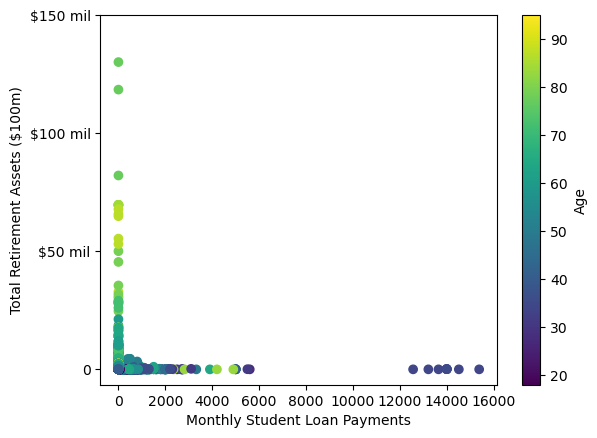

In [8]:
# Student Loan Payments vs Retirement, colorbar by age - full dataset

# Set x and y values
x_values = data_df['Total Student Loan Payments']
y_values = data_df['Total Equity: Quasi-Liquid Retirement Assets 2019']

# Create the scatterplot
plt.scatter(x_values,y_values,c=data_df['Age'])
clb = plt.colorbar()

# Create labels
plt.xlabel("Monthly Student Loan Payments")
plt.ylabel("Total Retirement Assets ($100m)")
clb.set_label("Age")

plt.yticks([0, 50000000, 100000000, 150000000], 
           ['0', '$50 mil', '$100 mil', '$150 mil'])

# Save an image of the graph
plt.savefig('Bekah 1a -all.png')

# Display the plot
plt.show()

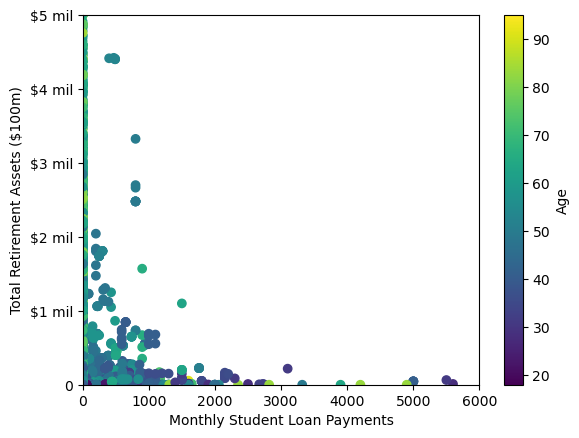

In [9]:
# Student Loan Payments vs Retirement, colorbar by age - limited view: under $5m retirement and under $6k loans

# All Retirement Accounts above $4.5m had $0 student loan payments.
# All Student Loan Payments over $6k had less than $120k in Retirement Accounts.

# Set x and y values
x_values = data_df['Total Student Loan Payments']
y_values = data_df['Total Equity: Quasi-Liquid Retirement Assets 2019']

# Create the scatterplot
plt.scatter(x_values,y_values,c=data_df['Age'])
clb = plt.colorbar()

# Create labels
plt.xlabel("Monthly Student Loan Payments")
plt.ylabel("Total Retirement Assets ($100m)")
clb.set_label("Age")

plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000], 
           ['0', '$1 mil', '$2 mil', '$3 mil', '$4 mil', '$5 mil'])

# Set the scatterplot limits to better show the data
plt.xlim(0, 6000)
plt.ylim(0, 5000000)

# Save an image of the graph
plt.savefig('Bekah 1b -5m 6k.png')

# Display the plot
plt.show()

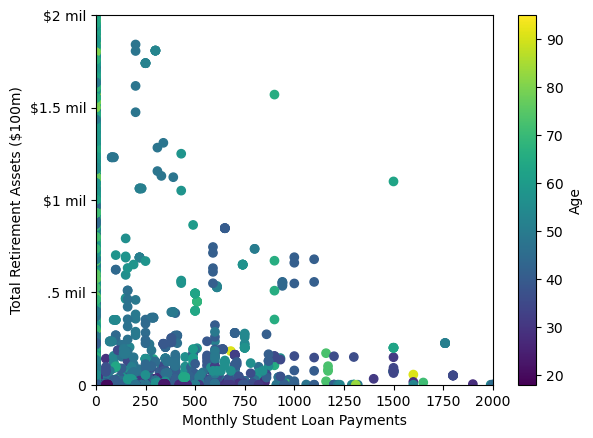

In [10]:
# Student Loan Payments vs Retirement, colorbar by age - limited view visually: under $2m retirement and under $2k loans

# All Retirement Accounts above $4.5 million had $0 student loan payments.
# All Student Loan Payments over $3,500 had less than $120k in Retirement Accounts.

# Set x and y values
x_values = data_df['Total Student Loan Payments']
y_values = data_df['Total Equity: Quasi-Liquid Retirement Assets 2019']

# Create the scatterplot
plt.scatter(x_values,y_values,c=data_df['Age'])
clb = plt.colorbar()

# Create labels
plt.xlabel("Monthly Student Loan Payments")
plt.ylabel("Total Retirement Assets ($100m)")
clb.set_label("Age")

plt.yticks([0, 500000, 1000000, 1500000, 2000000], 
           ['0', '.5 mil', '$1 mil', '$1.5 mil', '$2 mil'])

# Set the scatterplot limits to better show the data
plt.xlim(0, 2000)
plt.ylim(0, 2000000)

# Save an image of the graph
plt.savefig('Bekah 1c -2m 2k.png')

# Display the plot
plt.show()

In [11]:
# # Student Loans vs Retirement, colorbar by age, 40+

# age_df = data_df[data_df['Age'] > 40]

# x_values = age_df['Total Student Loan Payments']
# y_values = age_df['Total Equity: Quasi-Liquid Retirement Assets 2019']

# plt.scatter(x_values,y_values,c=age_df['Age'])
# clb = plt.colorbar()

# plt.yticks(np.arange(0, 131000000))

# plt.xlabel("Monthly Student Loan Payments")
# plt.ylabel("Total Retirement Assets ($M)")
# clb.set_label("Age")

# # plt.xlim(0, 3000)
# # plt.ylim(0, 400000)

# plt.show()

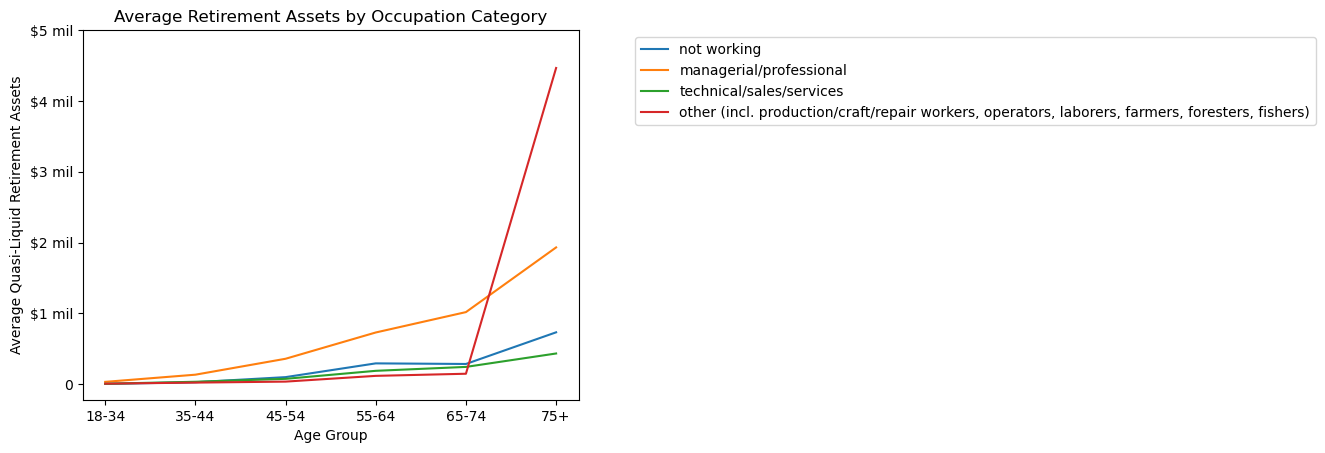

In [12]:
# For Occupation Categories: Line graphs of Average Retirement by Age Group

x_values = sorted(data_df["Age Group"].unique())

occs = data_df["Occupation Class"].unique()

for occ in occs:
    occ_df = data_df[data_df["Occupation Class"] == occ]
    y_values = occ_df.groupby("Age Group")["Total Equity: Quasi-Liquid Retirement Assets 2019"].mean()
    plt.plot(x_values, y_values, label=occ)

# Use real numbers as the y-axis markers
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000], 
           ['0', '$1 mil', '$2 mil', '$3 mil', '$4 mil', '$5 mil'])

# Add labels
plt.xlabel('Age Group')
plt.ylabel('Average Quasi-Liquid Retirement Assets')
plt.title('Average Retirement Assets by Occupation Category')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(2.5, 1), ncol=1)

# Save an image of the graph
plt.savefig('Bekah 1b -5m 6k.png')

# Display the plot
plt.show()

In [13]:
data_df.describe()

,Age,Kids,Industry,Total Value Assets 2019,Total Financial Assets 2019,Total Equity: Quasi-Liquid Retirement Assets 2019,Total value of Business Interest (active or non),Total Value Home Equity 2019,Current value in Pension 2019,Total Value IRA/Keogh accounts 2019,Total value of Debt Held 2019,Monthly rent 2019,Student Loan Payment 1,Student Loan Payment 2,Student Loan Payment 3,Student Loan Payment 4,Student Loan Payment 5,Student Loan Payment 6,Student Loan Payment 7,Monthly Mortgage Payment,Monthly Consumer Debt Payment,Total Monthly Debt Payments,Knowledge of Personal Finances,Total Income 2019,Income Percentile Group,SocSec/Pension Income 2019,Wage/Salary Income 2019,Total Networth 2019,Total Student Loan Payments
count,22975.000000,22975.000000,22975.000000,2.297500e+04,2.297500e+04,2.297500e+04,2.297500e+04,2.297500e+04,2.297500e+04,2.297500e+04,2.297500e+04,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,22975.000000,2.297500e+04,22975.000000,2.297500e+04,2.297500e+04,2.297500e+04,22975.000000
mean,54.468988,0.738629,2.442481,2.031705e+07,8.455668e+06,3.743356e+05,9.101727e+06,8.100826e+05,2.663360e+04,3.879138e+05,3.606429e+05,434.189046,27.649764,5.788030,0.994704,0.347334,0.051795,0.030033,0.105767,1412.126639,822.784884,2605.778102,7.498672,1.592855e+06,3.620022,2.547482e+04,1.765788e+05,1.995640e+07,34.967428
std,16.189081,1.108022,1.041193,1.109256e+08,6.479996e+07,2.268337e+06,6.112449e+07,3.077977e+06,3.671823e+05,3.050547e+06,2.544356e+06,1473.846914,269.895236,117.440736,27.029843,18.954832,2.516061,2.040754,5.791730,8906.981068,11026.351181,19207.465426,2.226037,1.244271e+07,1.829824,1.043884e+05,9.057205e+05,1.101707e+08,340.500811
min,18.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+02,-4.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000e+00,1.000000,0.000000e+00,-1.080912e+00,-5.555000e+05,0.000000
25%,42.000000,0.000000,2.000000,6.385000e+04,5.335000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.215556e+04,2.000000,0.000000e+00,0.000000e+00,3.590750e+04,0.000000
50%,56.000000,0.000000,2.000000,5.398000e+05,9.550000e+04,3.000000e+03,0.000000e+00,1.560000e+05,0.000000e+00,0.000000e+00,2.900000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,575.500000,8.000000,9.403933e+04,4.000000,0.000000e+00,4.539830e+04,3.845000e+05,0.000000
75%,67.000000,1.000000,4.000000,2.716900e+06,1.017015e+06,1.500000e+05,3.000000e+03,5.415000e+05,0.000000e+00,1.000000e+05,2.170000e+05,660.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1400.000000,440.000000,2070.000000,9.000000,2.648234e+05,6.000000,2.053732e+04,1.286285e+05,2.476105e+06,0.000000
max,95.000000,10.000000,4.000000,2.387781e+09,2.119722e+09,1.301220e+08,1.907840e+09,1.132300e+08,1.669000e+07,1.626700e+08,1.319900e+08,89000.000000,15383.333333,7000.000000,2500.000000,1800.000000,190.000000,150.000000,670.000000,711000.000000,673000.000000,874500.000000,10.000000,4.582309e+08,6.000000,3.335694e+06,3.013582e+07,2.387781e+09,15383.333333


In [14]:
#Summary of counts for various columns of interest

In [15]:
reason_saving_counts = data_df['Reason for Saving'].value_counts()
print(reason_saving_counts)

Reason for Saving
Saving for Liquidity/Future    9477
Saving for Retirement          6535
None Listed                    4932
Saving for Home                 953
Saving for Investment           562
Can't Save                      516
Name: count, dtype: int64


In [16]:
age_group_counts = data_df['Age Group'].value_counts()
print(age_group_counts)

Age Group
55-64    5130
65-74    4330
45-54    4100
35-44    3815
18-34    3065
75+      2535
Name: count, dtype: int64


In [17]:
education_counts = data_df['Education'].value_counts()
print(education_counts)

Education
Bachelors degree or higher       11368
some college or Assoc. degree     4939
high school diploma or GED        4522
no high school                    2146
Name: count, dtype: int64


In [18]:
family_structure_counts = data_df['Family Structure'].value_counts()
print(family_structure_counts)

Family Structure
married/LWP + no children                                       7640
married/LWP+ children                                           6885
not married/LWP + no children + reference person 55 or older    3535
not married/LWP + children + reference person under 55          2645
not married/LWP + children                                      2270
Name: count, dtype: int64


In [19]:
marital_status_counts = data_df['Marital Status'].value_counts()
print(marital_status_counts)

Marital Status
married/living with partner                14525
neither married nor living with partner     8450
Name: count, dtype: int64


In [20]:
occupation_category_counts = data_df['Occupation Category'].value_counts()
print(occupation_category_counts)

Occupation Category
work for someone else                                                           11385
retired/disabled + (student/homemaker/misc. not working and age 65 or older)     5695
self-employed/partnership                                                        4995
other groups not working (mainly those under 65 and out of the labor force)       900
Name: count, dtype: int64


In [21]:
occupation_class_counts = data_df['Occupation Class'].value_counts()
print(occupation_class_counts)

Occupation Class
managerial/professional                                                                            9425
not working                                                                                        6595
technical/sales/services                                                                           3805
other (incl. production/craft/repair workers, operators, laborers, farmers, foresters, fishers)    3150
Name: count, dtype: int64


In [22]:
race_counts = data_df['Race/Ethnicity'].value_counts()
print(race_counts)

Race/Ethnicity
white non-Hispanic                     14349
black/African-American non-Hispanic     3493
Hispanic or Latino                      3075
Asian                                   1785
Other or Multiple race                   273
Name: count, dtype: int64


In [23]:
life_cycle_counts = data_df['Life Cycle'].value_counts()
print(life_cycle_counts)

Life Cycle
55 or older and working                     6685
55 or older and not working                 5310
under 55 + married/LWP + children           4910
under 55 + not married/LWP + no children    2645
under 55 + married/LWP + no children        1885
under 55 + not married/LWP + children       1540
Name: count, dtype: int64


In [24]:
labor_force_counts = data_df['Labor Force'].value_counts()
print(labor_force_counts)

Labor Force
working in some way    17045
not working at all      5930
Name: count, dtype: int64


In [25]:
industry_counts = data_df['Industry'].value_counts()
print(industry_counts)

Industry
2    13356
4     6595
1     3024
Name: count, dtype: int64


In [26]:
household_expense_counts = data_df['Household Overall Expenses, last 12 mo'].value_counts()
print(household_expense_counts)

Household Overall Expenses, last 12 mo
unusually high    11369
normal            10460
unusually low      1146
Name: count, dtype: int64


In [27]:
#Save to csv
data_df.to_csv('survey_consumer_finances_output_AD', index =False)